In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

lavrentiya ru
barrow us
sorland no
twentynine palms us
yatou cn
puerto escondido mx
kyotera ug
samarai pg
dawlatabad af
bredasdorp za
hobart au
bubaque gw
oranjestad aw
nikolskoye ru
faanui pf
bluff nz
klaksvik fo
tasiilaq gl
hobart au
hanmer springs nz
kaitangata nz
mataura pf
ushuaia ar
mataura pf
port alfred za
bubaque gw
falealupo ws
albany au
dikson ru
baturaja id
illoqqortoormiut gl
kabalo cd
ushuaia ar
kapaa us
umea se
caravelas br
illoqqortoormiut gl
goderich sl
albany au
ulladulla au
halmstad se
georgetown sh
rikitea pf
albany au
port alfred za
nizhneyansk ru
sioux lookout ca
iseyin ng
nouadhibou mr
cabedelo br
jamestown sh
cape town za
ahuimanu us
rikitea pf
auki sb
opobo ng
nioro ml
lichuan cn
hobart au
ksenyevka ru
barrow us
turtkul uz
northam au
grand river south east mu
saint george bm
hilo us
logan lake ca
bredasdorp za
borama so
victoria sc
bafq ir
ternate id
punta arenas cl
blagodatnoye ua
kashi cn
hermanus za
tuatapere nz
khatanga ru
olinda br
krasnorechenskiy ru
yell

ushuaia ar
san jose gt
rikitea pf
weyburn ca
mar del plata ar
cabo san lucas mx
richards bay za
saint-georges gf
codrington ag
acapulco mx
namatanai pg
saint-philippe re
norman wells ca
belushya guba ru
aginskoye ru
ponta do sol pt
mataura pf
mar del plata ar
luderitz na
beyneu kz
angra pt
georgetown sh
arraial do cabo br
saskylakh ru
sorvag fo
liseleje dk
turan ru
rikitea pf
port alfred za
coquimbo cl
bathsheba bb
mataura pf
punta arenas cl
springdale ca
cape town za
bredasdorp za
punta arenas cl
tumannyy ru
punta arenas cl
cherskiy ru
taolanaro mg
punta arenas cl
port alfred za
albany au
georgetown sh
hammerfest no
hilo us
jutai br
chabahar ir
punta arenas cl
mayo ca
bredasdorp za
vaini to
penzance gb
tasiilaq gl
longyearbyen sj
vaini to
albany au
ribeira grande pt
cape town za
new norfolk au
bur gabo so
bambous virieux mu
bilibino ru
margate za
barrow us
thompson ca
cape town za
qaanaaq gl
bathsheba bb
port alfred za
peniche pt
tuktoyaktuk ca
ushuaia ar
tura ru
batagay ru
bluff nz
c

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
# Import the requests library.
import requests


In [15]:
# Import the API key.
from config import weather_api_key

In [16]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=800ed70e331330a9fb6a45e0d7fb6087'

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lavrentiya
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | sorland
Processing Record 4 of Set 1 | twentynine palms
Processing Record 5 of Set 1 | yatou
Processing Record 6 of Set 1 | puerto escondido
Processing Record 7 of Set 1 | kyotera
Processing Record 8 of Set 1 | samarai
Processing Record 9 of Set 1 | dawlatabad
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | bubaque
Processing Record 13 of Set 1 | oranjestad
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | faanui
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | klaksvik
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | hanmer springs
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | mataura
Processing Record 22 of Set 1 | ushuaia
Processing Record 23 of Set 1 |

Processing Record 31 of Set 4 | liaozhong
Processing Record 32 of Set 4 | coihaique
Processing Record 33 of Set 4 | qaanaaq
Processing Record 34 of Set 4 | newcastle
Processing Record 35 of Set 4 | masakin
Processing Record 36 of Set 4 | pemangkat
Processing Record 37 of Set 4 | plettenberg bay
Processing Record 38 of Set 4 | garowe
Processing Record 39 of Set 4 | dingle
Processing Record 40 of Set 4 | poum
Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | rio gallegos
Processing Record 44 of Set 4 | padang
Processing Record 45 of Set 4 | salisbury
Processing Record 46 of Set 4 | maniitsoq
Processing Record 47 of Set 4 | bosaso
Processing Record 48 of Set 4 | sile
Processing Record 49 of Set 4 | flin flon
Processing Record 50 of Set 4 | cherskiy
Processing Record 1 of Set 5 | saint-philippe
Processing Record 2 of Set 5 | kamyaran
Processing Record 3 of Set 5 | salina
Processing Record 4 of Set 5 | boulder city
Processing Re

Processing Record 24 of Set 8 | prince rupert
Processing Record 25 of Set 8 | najran
Processing Record 26 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 27 of Set 8 | emiliano zapata
Processing Record 28 of Set 8 | lakes entrance
Processing Record 29 of Set 8 | dunmore town
Processing Record 30 of Set 8 | horsham
Processing Record 31 of Set 8 | paamiut
Processing Record 32 of Set 8 | praia
Processing Record 33 of Set 8 | riosucio
Processing Record 34 of Set 8 | urucara
Processing Record 35 of Set 8 | sangmelima
Processing Record 36 of Set 8 | chuy
Processing Record 37 of Set 8 | zhangye
Processing Record 38 of Set 8 | makakilo city
Processing Record 39 of Set 8 | zyryanka
Processing Record 40 of Set 8 | ponta delgada
Processing Record 41 of Set 8 | peniche
Processing Record 42 of Set 8 | hun
Processing Record 43 of Set 8 | hithadhoo
Processing Record 44 of Set 8 | hami
Processing Record 45 of Set 8 | malwan
City not found. Skipping...
Processing Record 46

Processing Record 8 of Set 12 | almaznyy
Processing Record 9 of Set 12 | alberton
Processing Record 10 of Set 12 | rincon
Processing Record 11 of Set 12 | kulhudhuffushi
Processing Record 12 of Set 12 | port lincoln
Processing Record 13 of Set 12 | carballo
Processing Record 14 of Set 12 | havoysund
Processing Record 15 of Set 12 | koutsouras
Processing Record 16 of Set 12 | laguna
Processing Record 17 of Set 12 | kerzhenets
City not found. Skipping...
Processing Record 18 of Set 12 | aykhal
Processing Record 19 of Set 12 | payyannur
Processing Record 20 of Set 12 | marv dasht
City not found. Skipping...
Processing Record 21 of Set 12 | reus
Processing Record 22 of Set 12 | abu samrah
Processing Record 23 of Set 12 | cadillac
Processing Record 24 of Set 12 | mujiayingzi
Processing Record 25 of Set 12 | bonaventure
Processing Record 26 of Set 12 | maceio
Processing Record 27 of Set 12 | sucre
Processing Record 28 of Set 12 | eldikan
City not found. Skipping...
Processing Record 29 of Se

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lavrentiya,65.5833,-171.0000,44.02,99,100,6.98,RU,2022-09-12 16:27:07
1,Barrow,71.2906,-156.7887,33.82,100,100,19.57,US,2022-09-12 16:19:09
2,Sorland,67.6670,12.6934,51.66,83,100,12.35,NO,2022-09-12 16:27:48
3,Twentynine Palms,34.1356,-116.0542,78.84,67,32,3.13,US,2022-09-12 16:27:49
4,Yatou,37.1500,122.3833,66.25,86,51,2.75,CN,2022-09-12 16:27:49
5,Puerto Escondido,15.8500,-97.0667,81.43,61,75,0.00,MX,2022-09-12 16:23:16
6,Kyotera,-0.6156,31.5175,72.32,65,88,7.92,UG,2022-09-12 16:27:50
7,Samarai,-10.6167,150.6667,79.74,82,13,7.67,PG,2022-09-12 16:24:25
8,Dawlatabad,36.4141,64.9053,68.34,15,0,3.24,AF,2022-09-12 16:27:50
9,Bredasdorp,-34.5322,20.0403,55.85,61,43,11.14,ZA,2022-09-12 16:27:03


In [12]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head(20)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lavrentiya,RU,2022-09-12 16:27:07,65.5833,-171.0000,44.02,99,100,6.98
1,Barrow,US,2022-09-12 16:19:09,71.2906,-156.7887,33.82,100,100,19.57
2,Sorland,NO,2022-09-12 16:27:48,67.6670,12.6934,51.66,83,100,12.35
3,Twentynine Palms,US,2022-09-12 16:27:49,34.1356,-116.0542,78.84,67,32,3.13
4,Yatou,CN,2022-09-12 16:27:49,37.1500,122.3833,66.25,86,51,2.75
5,Puerto Escondido,MX,2022-09-12 16:23:16,15.8500,-97.0667,81.43,61,75,0.00
6,Kyotera,UG,2022-09-12 16:27:50,-0.6156,31.5175,72.32,65,88,7.92
7,Samarai,PG,2022-09-12 16:24:25,-10.6167,150.6667,79.74,82,13,7.67
8,Dawlatabad,AF,2022-09-12 16:27:50,36.4141,64.9053,68.34,15,0,3.24
9,Bredasdorp,ZA,2022-09-12 16:27:03,-34.5322,20.0403,55.85,61,43,11.14


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

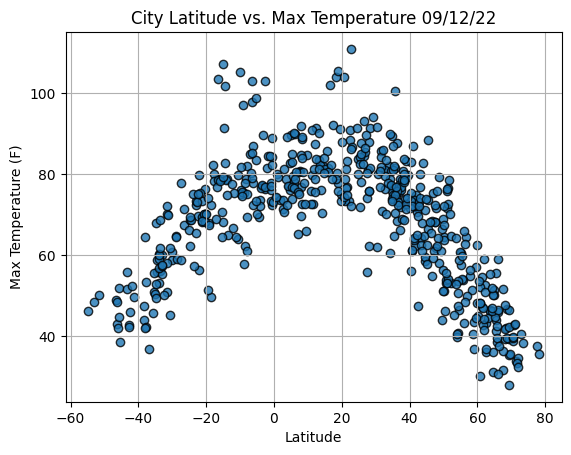

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

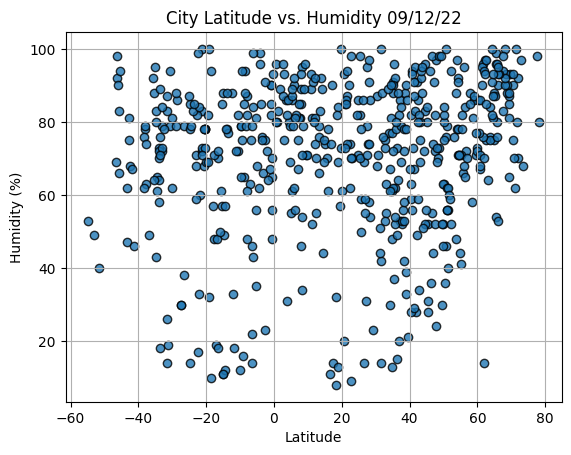

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

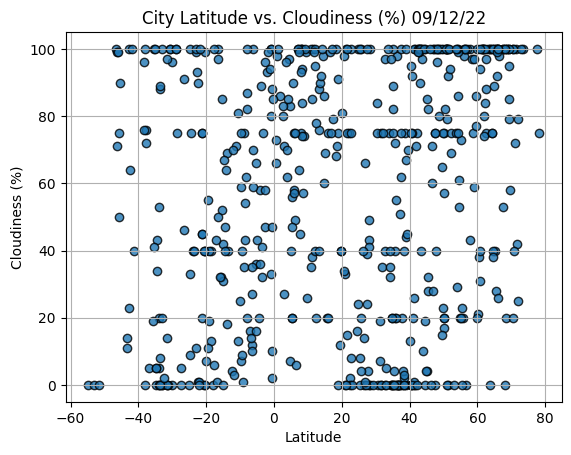

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

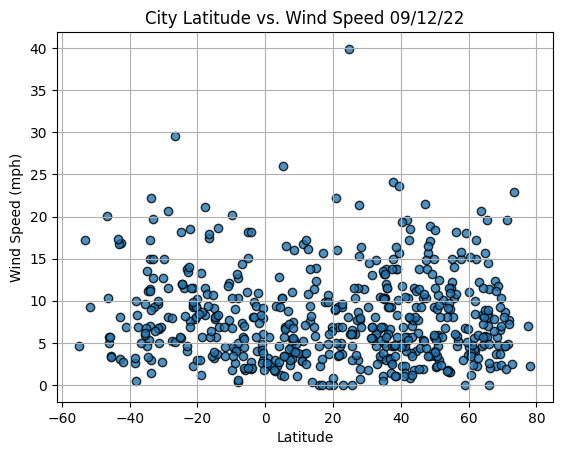

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()